# Random Forest Classification on Census Income

![](https://i.imgur.com/PR4YpWD.jpg)

## <font color=#68228B>Problem Statement<font>
- Predict Whether income of individual exceeds $50K/year or not based on attributes given

### Attribute Information
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st 4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Description
As the problem of inequality of income has become very prominent over the years, governments of different countries have been trying to address the problem so as to improve the economic stability of a nation.

In this study, Machine Learning Classification techniques is used in order to predict whether a person's yearly income falls in the income category of either greater than 50K Dollars or less then equal to 50K Dollars category based on a certain set of attributes. An analysis of this kind helps to figure out which individual attributes are necessary in improving an individual's income so that focus can be put on those specific factors so as to level up the income of individuals.

### Task Performed:
1. Data Ingestion
2. Handle the null values
3. Replace column_name
4. Seperate categorical and Numerical Features
5. Univariate Analysis
6. Bivariate Analysis
7. Handle the outliers
8. Seperate Dependent and Independent features
9. Label encoding of categorical features
10. Test Accuracy using :
	- Decision Tree Classifier
	- Hyper-parameter tunning on Decision Tree 
	- Random Forest Classifier
	- Hyper-parameter tunning on Random Forest Classifier
	- Bagging Classifier using SVC
	- Random Forest Classifier
	- Voting Classifier using Logistic Regression , Random forest classifier, GuassianNB
	- Extra Tree Classifier
	- Hyper-parameter tunning on Extra Tree Classifier
11. Make final report showing accuracy of all models
12. Store the best model in pickle file

### Import required libraries

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier




### Data Ingestion

In [2]:
df= pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\adult_cencus_Income.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

### Check how many class in income feature

In [4]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Convert classes in income feature to 0 and 1

In [5]:
df['income'] = df['income'].map({"<=50K": 0,">50K":1})

In [6]:
df['income'].unique()

array([0, 1], dtype=int64)

### Check special symbols in data 

In [7]:
df[df['workclass'] == "?"][:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


### Replace special symbol with np.nan

In [8]:
df.replace("?",np.NAN,inplace = True)

### Chech the null values

In [9]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Note
- If the feature is categorical feature then we have to use `bfill`
- `bfill` replaces NaN with forward & backward values

In [10]:
# replacing NaN with forward & backward values
df['workclass'] = df['workclass'].fillna(method = 'bfill')
df['occupation'] = df['occupation'].fillna(method = 'bfill')
df['native.country'] = df['native.country'].fillna(method = 'pad')

### Check the null values again

In [11]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Replace columns names 

In [12]:
df.rename(columns= {
    'education.num' : "education_num",
    "marital.status" : "marital_status",
    "capital.gain" : "capital_gain",
    "capital.loss" : "capital_loss",
    "hours.per.week" : "hours_per_week",
    "native.country" : "native_country"
},inplace= True)


In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Seperate categorical and numerical features

In [19]:
categorical_fea = [col for col in df.columns if df[col].dtype == object]
numerical_fea = [col for col in df.columns if df[col].dtype != object]

In [20]:
## Categorical Features
categorical_fea

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [21]:
## Numerical Features
numerical_fea

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

### Univariate Analysis

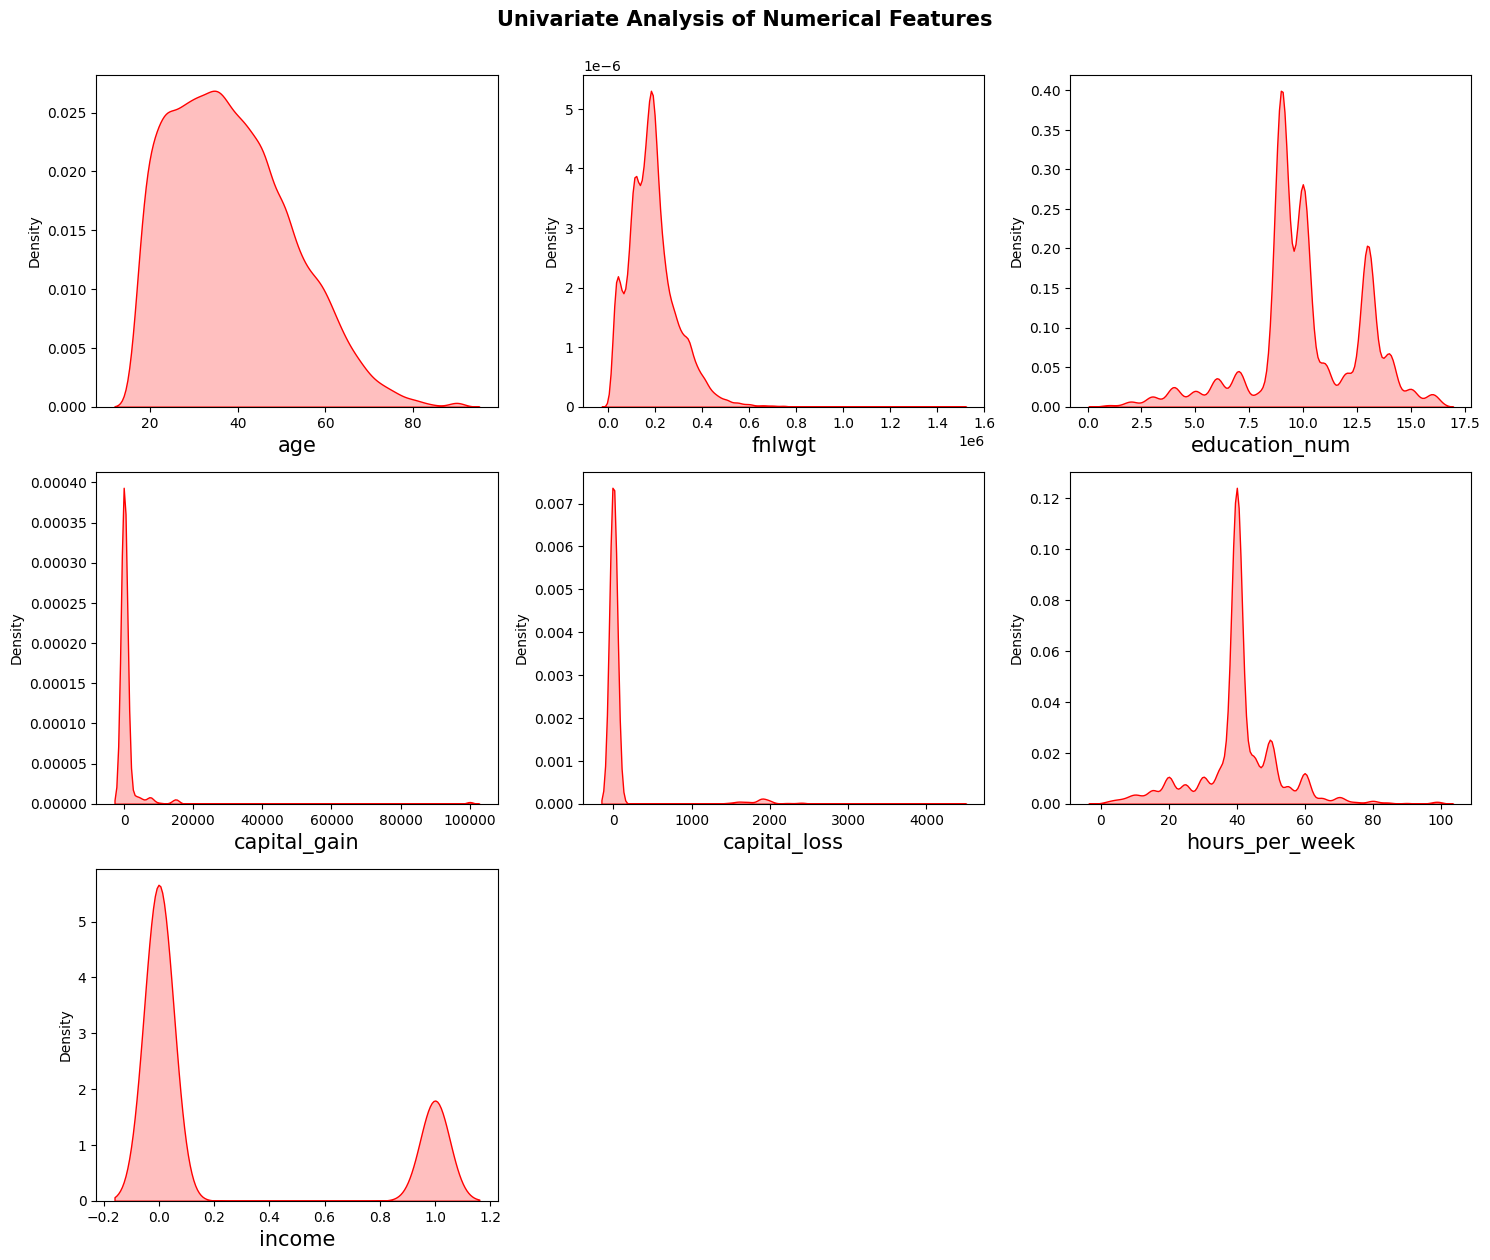

In [22]:
plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontweight = "bold",fontsize=15,y = 1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_fea[i]],shade = True, color='r',data=df) 
    plt.xlabel(numerical_fea[i],fontsize = 15)
    plt.tight_layout()

1. Age is aprroximately normally distributed.
2. Final weight,capital loss & capital gain are heavily right skewed.


### Bivariate Analysis

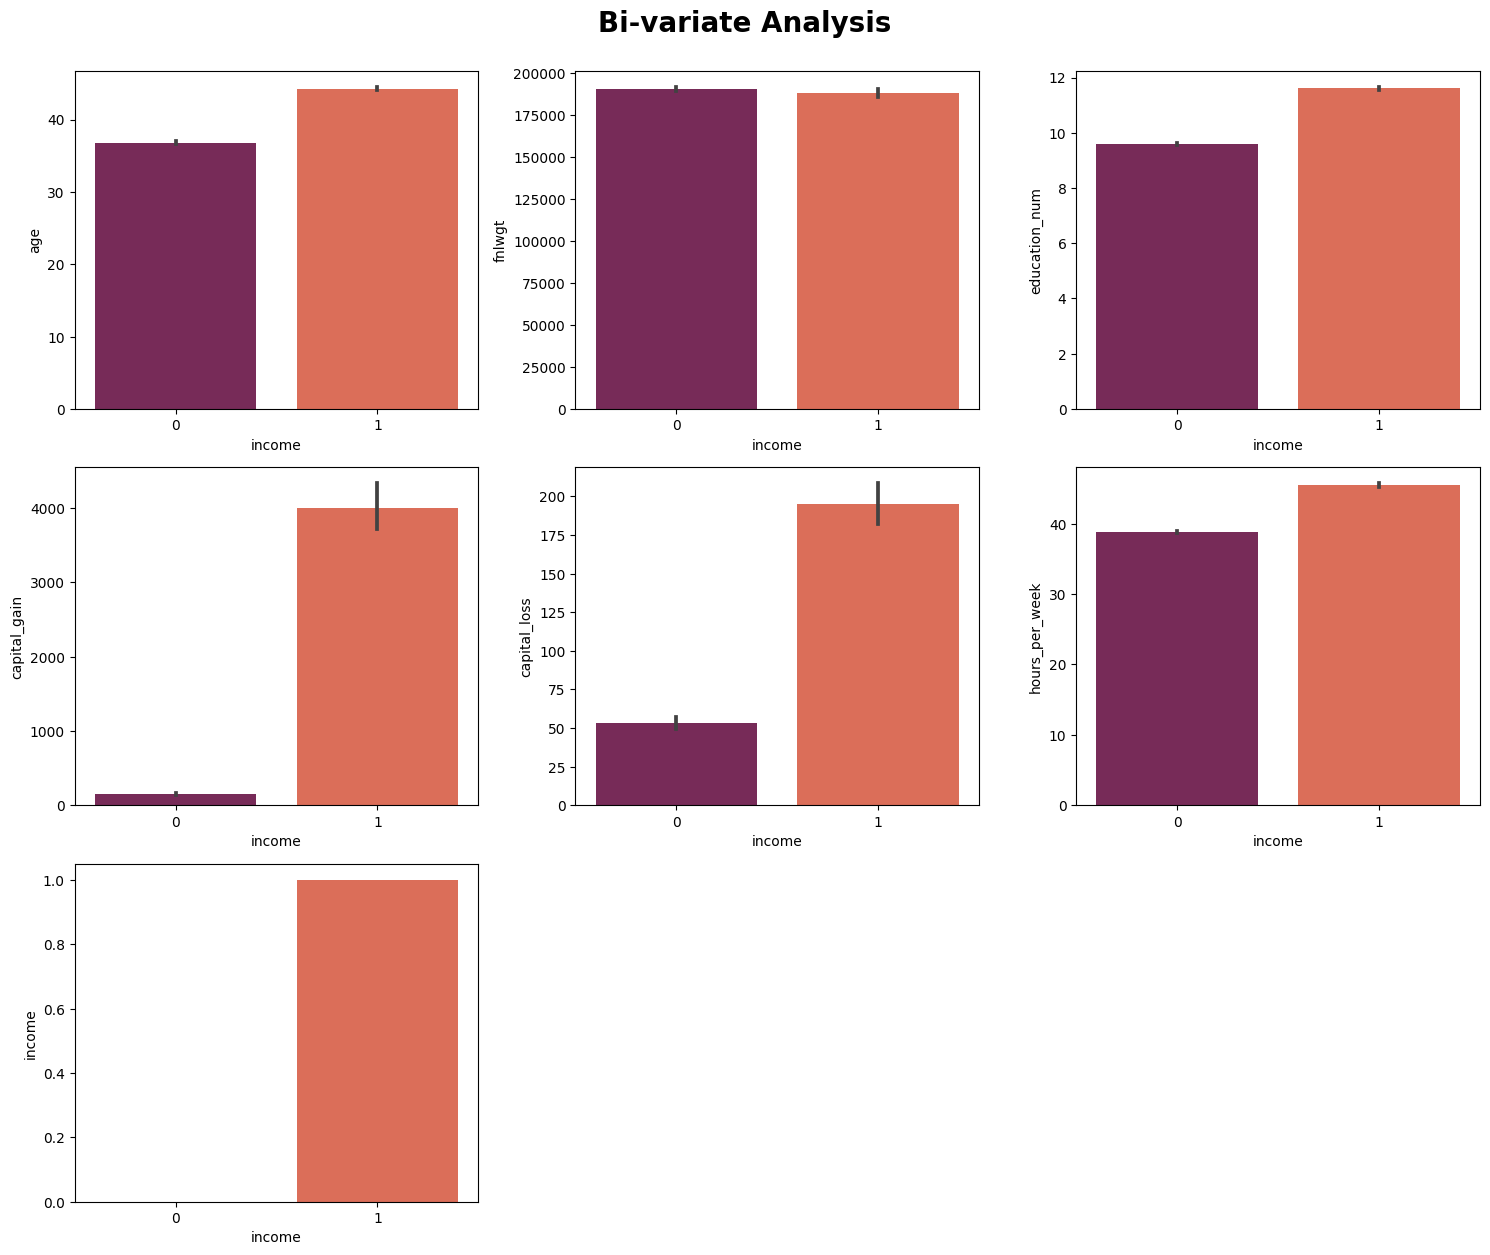

In [23]:
plt.figure(figsize=(15,20))
plt.suptitle('Bi-variate Analysis', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1) 
    sns.barplot(y=numerical_fea [i], x='income', data = df,palette ="rocket") 
    plt.tight_layout()

### Check distribution and outliers together
- Plot 2 Graphs Together

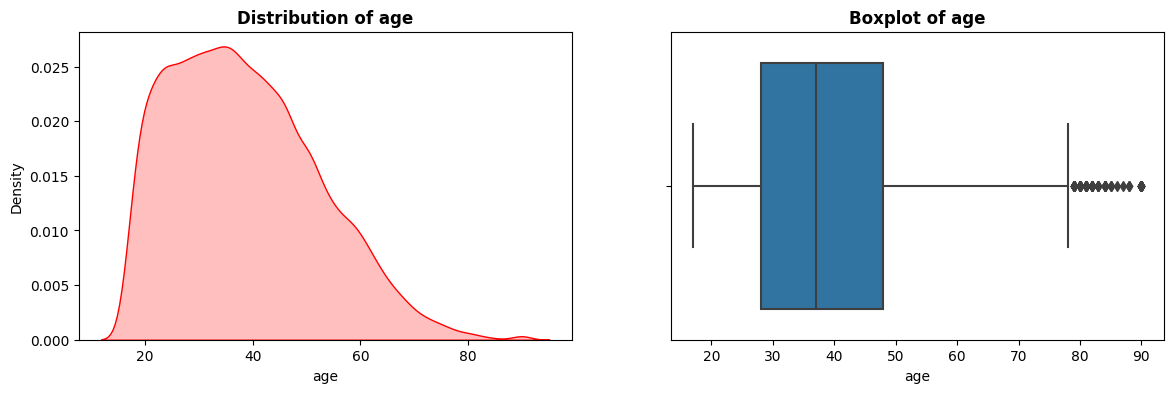

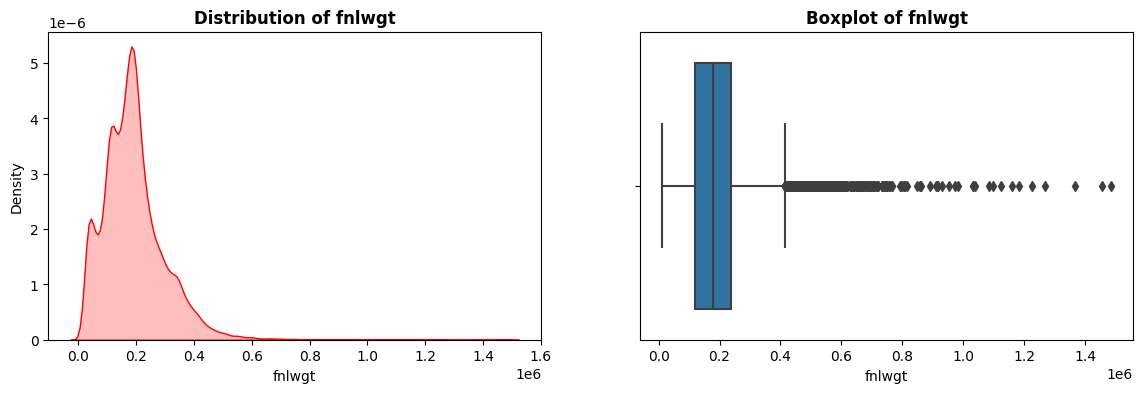

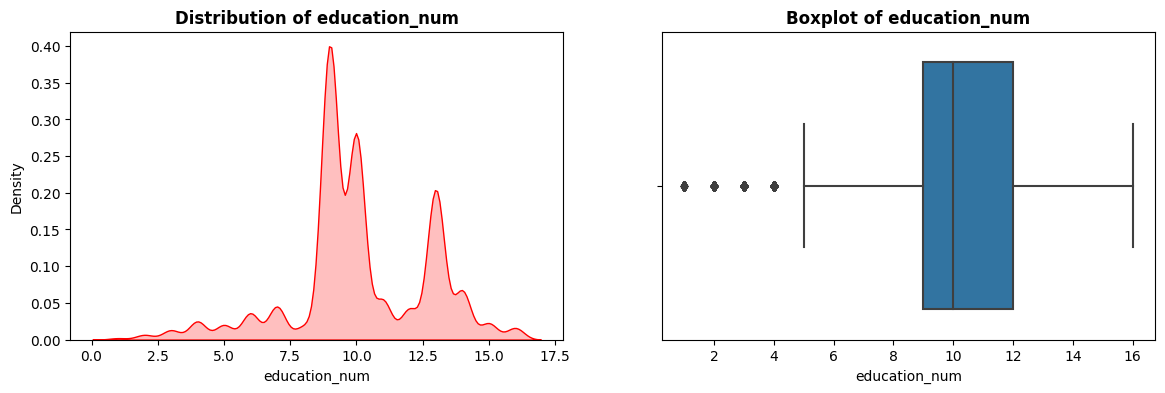

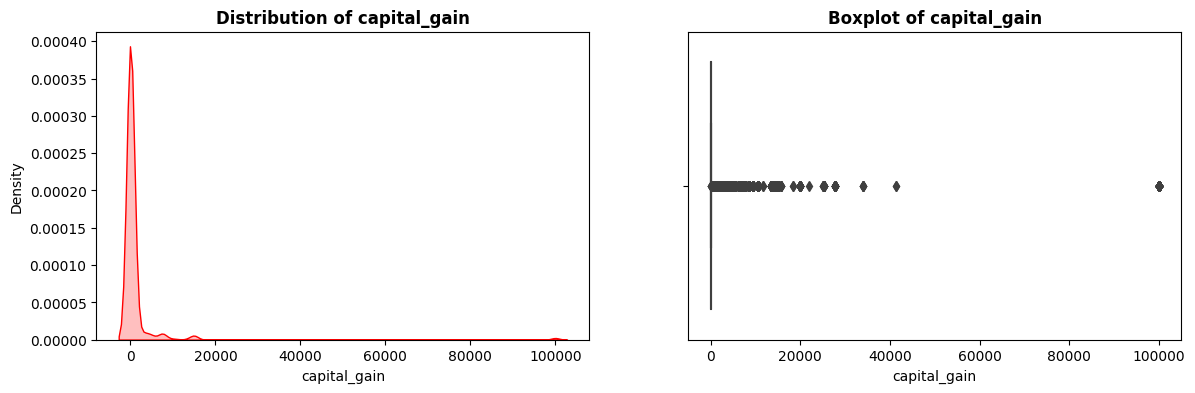

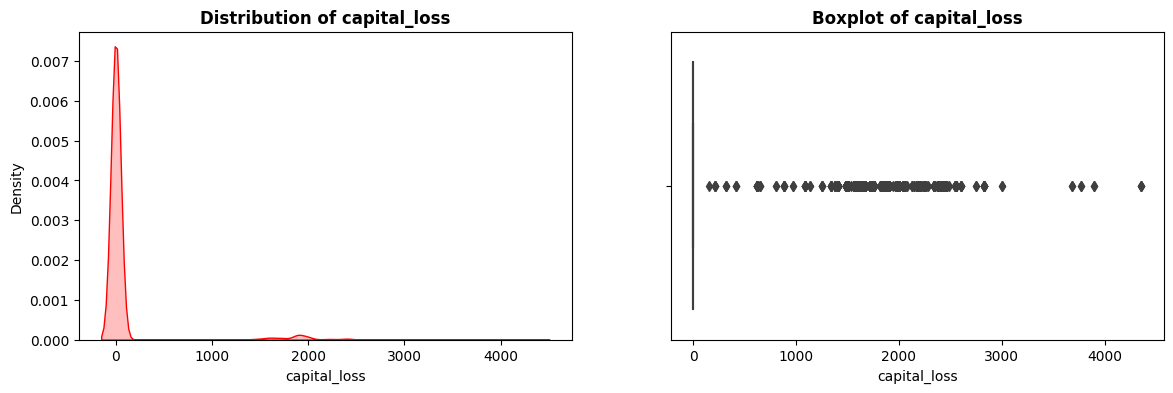

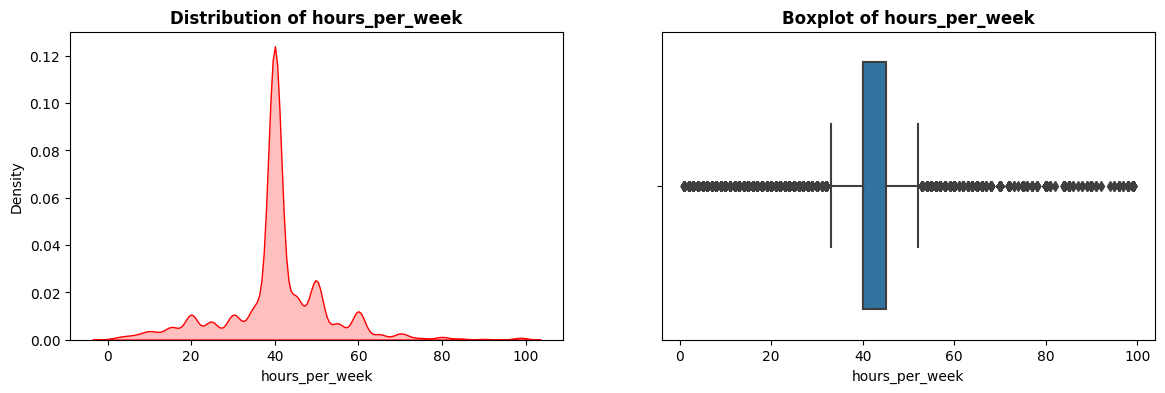

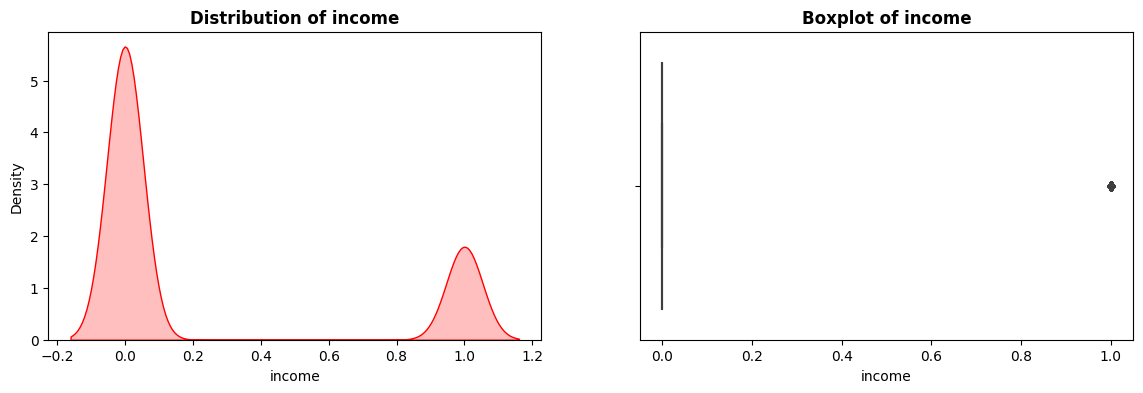

In [24]:
for fea in numerical_fea:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.kdeplot(x=df[fea],shade = True, color='r',data=df) 
    plt.title("Distribution of {}".format(fea),fontweight = 'bold' )
    
    plt.subplot(122)
    sns.boxplot(x= fea,data = df[numerical_fea]) 
    plt.title("Boxplot of {}".format(fea),fontweight = 'bold' )
    plt.show()

### Handling the outliers

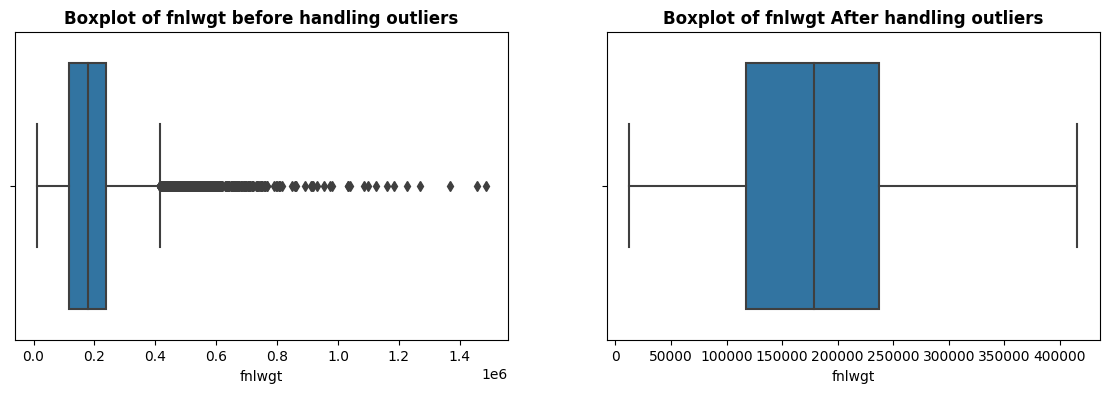

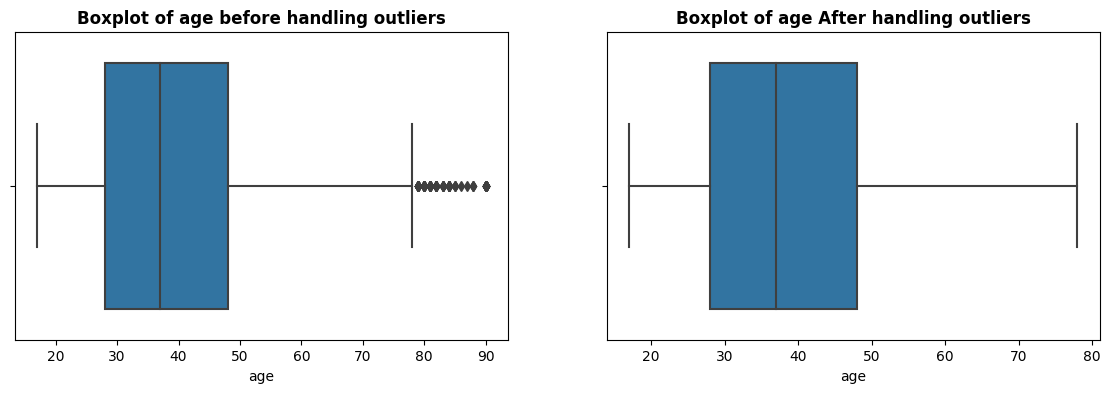

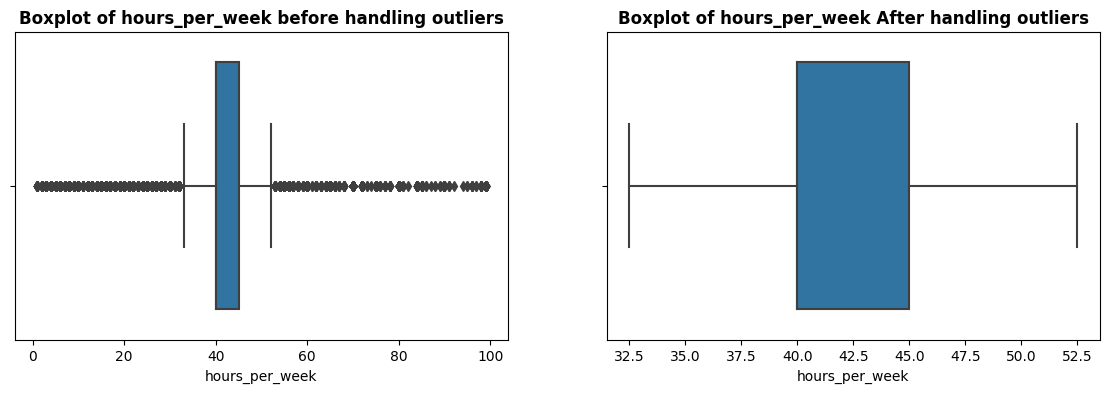

In [25]:
# Handling the outliers
df1 = df.copy()
feature_to_use = ["fnlwgt",'age','hours_per_week']

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = df)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

### Seperate independent and dependent

In [26]:
x = df1.iloc[:,:-1]
y = df1['income']

In [27]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,Private,77053.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40.0,United-States
1,78.0,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States
2,66.0,Private,186061.0,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40.0,United-States
3,54.0,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States
4,41.0,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Label encoding on the categorical features
- If the data of feature is continous or discrete (numbers) then we dont have to do anything and we can directly standardize and train the model
- But when the data is categorical (string) then we have to perform encoding, it means convert it to 0 or 1, then only we can train the model

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [30]:
x[categorical_fea] = x[categorical_fea].apply(LabelEncoder().fit_transform)

In [31]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,3,77053.0,11,9,6,3,1,4,0,0,4356,40.0,38
1,78.0,3,132870.0,11,9,6,3,1,4,0,0,4356,32.5,38
2,66.0,3,186061.0,15,10,6,6,4,2,0,0,4356,40.0,38
3,54.0,3,140359.0,5,4,0,6,4,4,0,0,3900,40.0,38
4,41.0,3,264663.0,15,10,5,9,3,4,0,0,3900,40.0,38


In [32]:
y .head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [34]:
x_train.shape,y_train.shape

((21815, 14), (21815,))

In [35]:
x_test.shape,y_test.shape

((10746, 14), (10746,))

In [96]:
report = []

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
model.score(x_test,y_test)

0.8120230783547366

In [39]:
dt_pred = model.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score
d_acc = accuracy_score(y_test,dt_pred)
report.append(['Decision Tree',d_acc])
d_acc

0.8120230783547366

### Hyperparameter Tunning of decision Tree

In [41]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']
}

In [42]:
dt_grid=GridSearchCV(estimator=model, param_grid= grid_param, cv = 3, n_jobs = -1)

In [43]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

![](https://i.imgur.com/e2UAX0u.jpg)

In [44]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [45]:
dt_best_para = DecisionTreeClassifier(criterion = "gini", max_depth= 8 , min_samples_leaf= 9, min_samples_split= 2 , splitter= "best")

In [46]:
dt_best_para.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

In [47]:
dt_best_para_pred2 = dt_best_para.predict(x_test)

In [48]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,dt_pred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.8120230783547366
Accuracy after Hyper-parameter tunning: 0.8536199516099013


In [105]:
hd_acc = accuracy_score(y_test,dt_best_para_pred2)
report.append(['Decision Tree Hyperparameter tunned',hd_acc])

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [50]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = rf_model.predict(x_test)

In [106]:
# Before Hyper-parameter tunning
rf_acc = accuracy_score(y_test,y_pred_rf)
report.append(['Random Forest',rf_acc])
accuracy_score(y_test,y_pred_rf)

0.8539921831379118

In [53]:
grid_param = {
    'n_estimators':[90,100],
    'criterion':['gini','entropy'],
    'max_depth': range(2,12,1),
    'min_samples_leaf': range(1,5,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','log2']
}

In [54]:
rf_grid_search = GridSearchCV(estimator= rf_model, param_grid= grid_param, cv = 3, n_jobs = -1)

In [55]:
rf_grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 12),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100]})

![](https://i.imgur.com/puxFQ0k.jpg)

In [56]:
rf_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
(criterion: 'gini',max_depth: 11,max_features: 'log2', min_samples_leaf: 1, min_samples_split: 3, n_estimators: 100)

In [58]:
rf_model_bestpara = RandomForestClassifier(criterion = 'gini',max_depth= 11,max_features='log2', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 100)

In [60]:
rf_model_bestpara.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_split=3)

In [61]:
y_pred_rf_bestpara = rf_model_bestpara.predict(x_test)

In [107]:
rfh_acc = accuracy_score(y_test,y_pred_rf_bestpara)
report.append(['Random Forest Hypertunned',rfh_acc])
accuracy_score(y_test,y_pred_rf_bestpara)

0.860320119114089

### Bagging Classifier using SVC

In [63]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=0)

In [64]:
model_bag_svc.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

![](https://i.imgur.com/lJUVcCq.jpg)

In [65]:
y_pred_bag = model_bag_svc.predict(x_test)

In [108]:
bg_acc = accuracy_score(y_test, y_pred_bag)
report.append(['Bagging Classifier using SVC',bg_acc])
accuracy_score(y_test, y_pred_bag)

0.7949934859482598

### Voting Classifier

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class= 'multinomial',random_state=1)
clf2 =RandomForestClassifier(n_estimators= 50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators= [('lr',clf1),('rf',clf2),('gnb',clf3)], voting = 'hard', n_jobs=-1)

In [72]:
eclf1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 n_jobs=-1)

![](https://i.imgur.com/bQmVeaW.jpg)

![](https://i.imgur.com/ZDkyPKM.jpg)

In [73]:
y_pred_votting = eclf1.predict(x_test)

In [110]:
vc_acc = accuracy_score(y_test,y_pred_votting)
report.append(['Voting Classifier',vc_acc])
accuracy_score(y_test,y_pred_votting)

0.8106272101246975

### Extra Tree Classifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [76]:
et_model.fit(x_train,y_train)

ExtraTreesClassifier()

In [77]:
y_pred_et = et_model.predict(x_test)

In [111]:
et_acc = accuracy_score(y_test,y_pred_et)
report.append(['Extra Trees Classifier', et_acc])
accuracy_score(y_test,y_pred_et)

0.8439419318816304

### Hyperparameter tunning of ET_model

In [79]:
grid_param_et = {
    'n_estimators':[90,100],
    'criterion':['gini','entropy'],
    'max_depth': range(2,12,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['sqrt', 'log2']
}

In [81]:
grid_search_bestpara = GridSearchCV(estimator = et_model, param_grid= grid_param_et, cv = 3, n_jobs=-1)

In [82]:
grid_search_bestpara.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 12),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100]})

![](https://i.imgur.com/qmJ3zYZ.jpg)

In [91]:
grid_search_bestpara.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

In [92]:
et_best_para = ExtraTreesClassifier( criterion = 'gini', max_depth= 11,  max_features = 'sqrt',min_samples_leaf= 1,min_samples_split = 5,n_estimators = 90)

In [93]:
et_best_para.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=11, min_samples_split=5, n_estimators=90)

In [94]:
y_pred_et = et_best_para.predict(x_test)

In [112]:
et_acc_ht = accuracy_score(y_test,y_pred_et)
report.append(['Extra Tress Classifier Hypertuned', et_acc_ht])
accuracy_score(y_test,y_pred_et)

0.8439419318816304

In [113]:
report

[['Decision Tree', 0.8120230783547366],
 ['Decision Tree Hyperparameter tunned', 0.8536199516099013],
 ['Random Forest', 0.8539921831379118],
 ['Random Forest Hypertunned', 0.860320119114089],
 ['Bagging Classifier using SVC', 0.7949934859482598],
 ['Voting Classifier', 0.8106272101246975],
 ['Extra Trees Classifier', 0.8439419318816304],
 ['Extra Tress Classifier Hypertuned', 0.8439419318816304]]

In [114]:
i_report = pd.DataFrame(report, columns = ['Classifier','Accuracy'])

In [117]:
i_report.sort_values(by = "Accuracy",ascending = False)

,Classifier,Accuracy
3,Random Forest Hypertunned,0.860320
2,Random Forest,0.853992
1,Decision Tree Hyperparameter tunned,0.853620
6,Extra Trees Classifier,0.843942
7,Extra Tress Classifier Hypertuned,0.843942
0,Decision Tree,0.812023
5,Voting Classifier,0.810627
4,Bagging Classifier using SVC,0.794993


## Summary
Random Forrest with hyperparameter tunning gives the best accuracy

### Store the Best model (Random Forest Hypertunned) in a pickle file

In [118]:
import pickle
pickle.dump(rf_model_bestpara, open('randomforest_hupertuned.sav','wb'))